In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random


- Крупная агломерация, города и пригороды
- Карта метро большого города
- Переходы - 1 станция метро
- Веса - время прохода от станции к станции
- У нас есть склады на станциях и клиенты хотят забрать заказанный товар
#### Задача: (есть конкуренты) надо определить нормированное время гарантированной доставки
1. Сколько минимально складов надо разместить на схеме метро чтобы гарантированно довести товар не более чем за 25 мин до любой станции
2. Выделить где будут размещены эти склады
3. Уменьшаем время доставки (конкуренты) - кол-во складов увеличивается (3 варианта уменьшения - 5, 10, 15 мин) и визуализировать
4. 

In [48]:
# Загрузили json файл со схемой метро Санкт-Петербурга - название станций, их координаты, а также удобный перебор по линиям метро для создания ребер
# https://github.com/jarosluv/russian_infrastructure/blob/master/saint_petersburg/metro_stations.json

import json

all_stations = {"station": []}

with open("./stations.json", "r") as f:
    metro_stations = json.load(f)


for line in metro_stations:
    # print(line["stations"])
    for each_station in line["stations"]:
        all_stations["station"].append(each_station)
# all_stations = metro_stations[0]["stations"]
all_stations

{'station': [{'name': 'Девяткино', 'latlon': [60.050251, 30.442809]},
  {'name': 'Гражданский проспект', 'latlon': [60.034915, 30.418276]},
  {'name': 'Академическая', 'latlon': [60.012719, 30.396133]},
  {'name': 'Политехническая', 'latlon': [60.008815, 30.370908]},
  {'name': 'Площадь Мужества', 'latlon': [59.999615, 30.366497]},
  {'name': 'Лесная', 'latlon': [59.984769, 30.344354]},
  {'name': 'Выборгская', 'latlon': [59.971024, 30.347345]},
  {'name': 'Площадь Ленина', 'latlon': [59.955723, 30.356014]},
  {'name': 'Чернышевская', 'latlon': [59.944436, 30.359975]},
  {'name': 'Площадь Восстания', 'latlon': [59.931517, 30.360559]},
  {'name': 'Владимирская', 'latlon': [59.927455, 30.348225]},
  {'name': 'Пушкинская', 'latlon': [59.920614, 30.329864]},
  {'name': 'Технологический институт – 1', 'latlon': [59.916342, 30.318545]},
  {'name': 'Балтийская', 'latlon': [59.907135, 30.299519]},
  {'name': 'Нарвская', 'latlon': [59.901111, 30.275004]},
  {'name': 'Кировский завод', 'latlon':

In [49]:
metro_stations

[{'line': {'id': '1', 'name': 'Кировско-Выборгская'},
  'stations': [{'name': 'Девяткино', 'latlon': [60.050251, 30.442809]},
   {'name': 'Гражданский проспект', 'latlon': [60.034915, 30.418276]},
   {'name': 'Академическая', 'latlon': [60.012719, 30.396133]},
   {'name': 'Политехническая', 'latlon': [60.008815, 30.370908]},
   {'name': 'Площадь Мужества', 'latlon': [59.999615, 30.366497]},
   {'name': 'Лесная', 'latlon': [59.984769, 30.344354]},
   {'name': 'Выборгская', 'latlon': [59.971024, 30.347345]},
   {'name': 'Площадь Ленина', 'latlon': [59.955723, 30.356014]},
   {'name': 'Чернышевская', 'latlon': [59.944436, 30.359975]},
   {'name': 'Площадь Восстания', 'latlon': [59.931517, 30.360559]},
   {'name': 'Владимирская', 'latlon': [59.927455, 30.348225]},
   {'name': 'Пушкинская', 'latlon': [59.920614, 30.329864]},
   {'name': 'Технологический институт – 1', 'latlon': [59.916342, 30.318545]},
   {'name': 'Балтийская', 'latlon': [59.907135, 30.299519]},
   {'name': 'Нарвская', 'lat

In [50]:
len(all_stations["station"])

# Добавляем ребра
metro_edges = []

for line in metro_stations:
    # print(line["stations"])
    metro_edges
    for i in range(len(line["stations"]) - 1):
        metro_edges.append([line["stations"][i]["name"], line["stations"][i+1]["name"]])

metro_edges

[['Девяткино', 'Гражданский проспект'],
 ['Гражданский проспект', 'Академическая'],
 ['Академическая', 'Политехническая'],
 ['Политехническая', 'Площадь Мужества'],
 ['Площадь Мужества', 'Лесная'],
 ['Лесная', 'Выборгская'],
 ['Выборгская', 'Площадь Ленина'],
 ['Площадь Ленина', 'Чернышевская'],
 ['Чернышевская', 'Площадь Восстания'],
 ['Площадь Восстания', 'Владимирская'],
 ['Владимирская', 'Пушкинская'],
 ['Пушкинская', 'Технологический институт – 1'],
 ['Технологический институт – 1', 'Балтийская'],
 ['Балтийская', 'Нарвская'],
 ['Нарвская', 'Кировский завод'],
 ['Кировский завод', 'Автово'],
 ['Автово', 'Ленинский проспект'],
 ['Ленинский проспект', 'Проспект Ветеранов'],
 ['Парнас', 'Проспект Просвещения'],
 ['Проспект Просвещения', 'Озерки'],
 ['Озерки', 'Удельная'],
 ['Удельная', 'Пионерская'],
 ['Пионерская', 'Чёрная речка'],
 ['Чёрная речка', 'Петроградская'],
 ['Петроградская', 'Горьковская'],
 ['Горьковская', 'Невский проспект'],
 ['Невский проспект', 'Сенная площадь'],
 ['С

In [110]:
# Добавляем пересадки

exchanges = [["Невский проспект", "Гостиный двор"], ["Площадь Восстания", "Маяковская"],
             ["Достоевская", "Владимирская"], ["Площадь Александра Невского – 1", "Площадь Александра Невского"],
             ['Спасская', 'Садовая'], ['Сенная площадь', 'Садовая'], ['Сенная площадь', 'Садовая'], ["Звенигородская", "Пушкинская"],
             ["Технологический институт – 1", "Технологический институт – 2"]]

metro_edges.extend(exchanges)

In [93]:
from scipy.spatial.distance import cdist


coordinates = [i["latlon"] for i in all_stations["station"]]
print(coordinates)
# # Соединяем пересадки по самому близкому расстоянию

c_distances = cdist(coordinates, [all_stations["station"][0]["latlon"]], "euclidean")
# # return int(algo_data_blitz_1.iloc[c_distances.argmin()]["move_time"]
print(c_distances[0])
print(coordinates[c_distances.argmin()])




[[60.050251, 30.442809], [60.034915, 30.418276], [60.012719, 30.396133], [60.008815, 30.370908], [59.999615, 30.366497], [59.984769, 30.344354], [59.971024, 30.347345], [59.955723, 30.356014], [59.944436, 30.359975], [59.931517, 30.360559], [59.927455, 30.348225], [59.920614, 30.329864], [59.916342, 30.318545], [59.907135, 30.299519], [59.901111, 30.275004], [59.879638, 30.26196], [59.867308, 30.261403], [59.851774, 30.268428], [59.84211, 30.250588], [60.066971, 30.333996], [60.05141, 30.332541], [60.037131, 30.321878], [60.016721, 30.315886], [60.002517, 30.296662], [59.985512, 30.30083], [59.966498, 30.31143], [59.956147, 30.318833], [59.935579, 30.327025], [59.926972, 30.320458], [59.9166, 30.318779], [59.906179, 30.31753], [59.891494, 30.31797], [59.879164, 30.318716], [59.866269, 30.321887], [59.848873, 30.321483], [59.833154, 30.349321], [59.829328, 30.375588], [59.98778, 30.202501], [59.971879, 30.211942], [59.948456, 30.234633], [59.942525, 30.278247], [59.933947, 30.333664], [

Девяткино
Гражданский проспект
Академическая
Политехническая
Площадь Мужества
Лесная
Выборгская
Площадь Ленина
Чернышевская
Площадь Восстания
Владимирская
Пушкинская
Технологический институт – 1
Балтийская
Нарвская
Кировский завод
Автово
Ленинский проспект
Проспект Ветеранов
Парнас
Проспект Просвещения
Озерки
Удельная
Пионерская
Чёрная речка
Петроградская
Горьковская
Невский проспект
Сенная площадь
Технологический институт – 2
Фрунзенская
Московские ворота
Электросила
Парк Победы
Московская
Звёздная
Купчино
Беговая
Зенит
Приморская
Василеостровская
Гостиный двор
Маяковская
Площадь Александра Невского – 1
Елизаровская
Ломоносовская
Пролетарская
Обухово
Рыбацкое
Спасская
Достоевская
Лиговский проспект
Площадь Александра Невского
Новочеркасская
Ладожская
Проспект Большевиков
Улица Дыбенко
Комендантский проспект
Старая Деревня
Крестовский остров
Чкаловская
Спортивная
Адмиралтейская
Садовая
Звенигородская
Обводный канал
Волковская
Бухарестская
Международная
Проспект Славы
Дунайская
Шушары


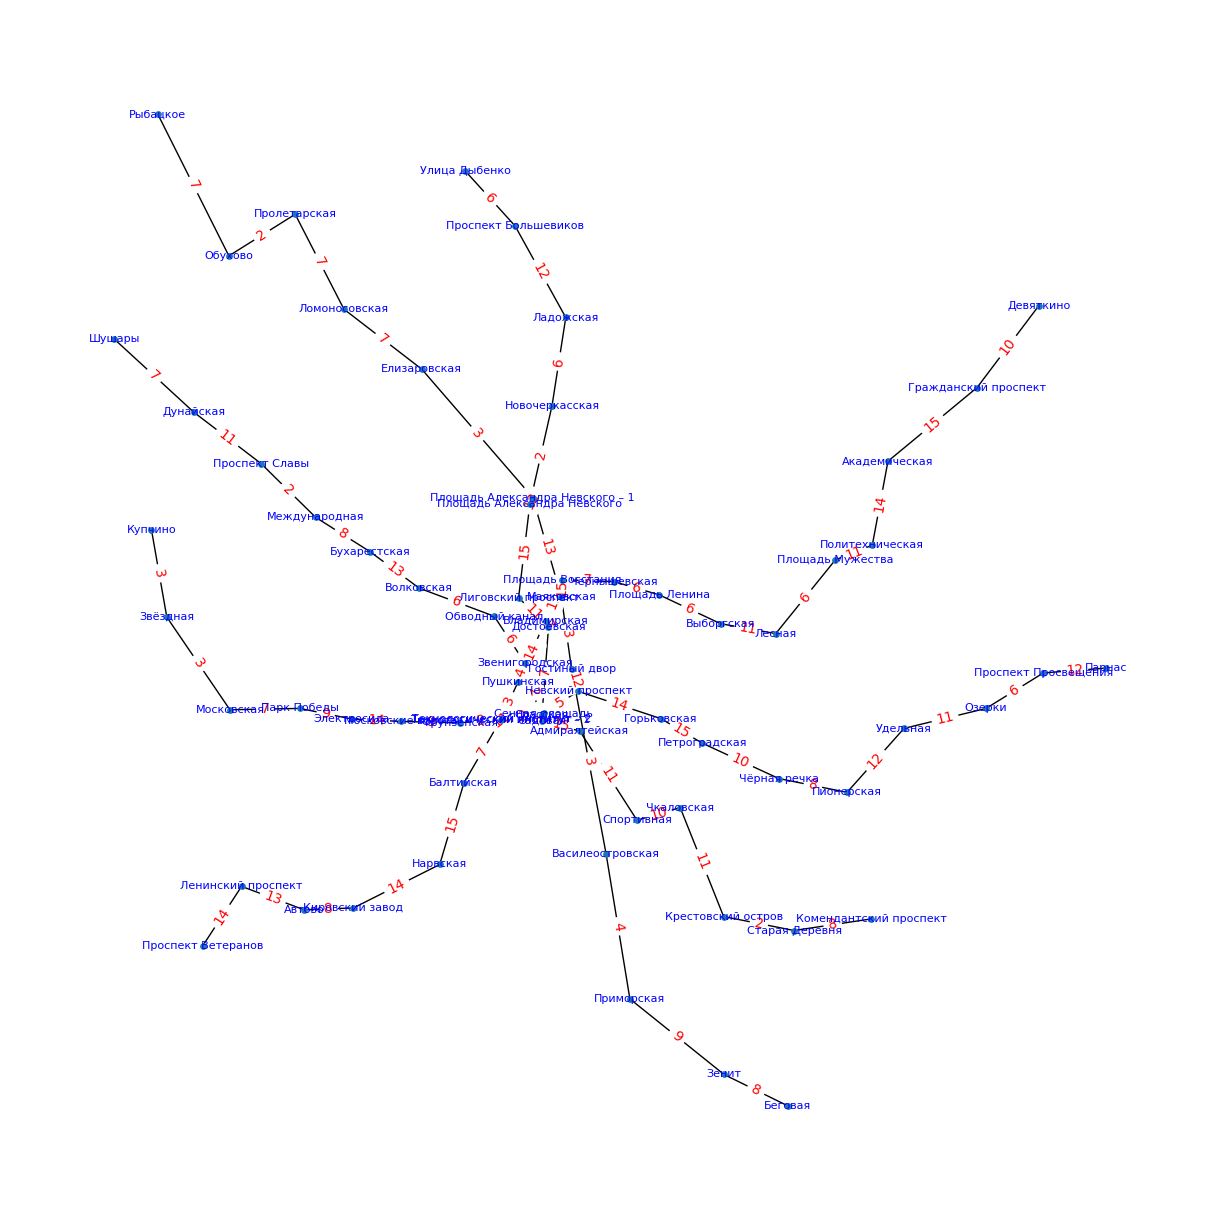

In [112]:
import networkx as nx
import matplotlib.pyplot as plt

# Создаем пустой граф
metro_graph = nx.Graph()

# Добавляем вершины графа
for station in all_stations["station"]:
    print(station["name"])
    metro_graph.add_node(station["name"], pos=station["latlon"])

# Добавляем ребра и веса
metro_graph.add_edges_from(metro_edges)

for u, v in metro_graph.edges():
    metro_graph[u][v]['weight'] = random.randint(2, 15)
    # print(metro_graph[u][v]['weight'])

edge_labels = nx.get_edge_attributes(metro_graph, "weight")
# print(edge_labels)
# Рисуем граф
plt.figure(figsize=(12, 12))


pos = nx.get_node_attributes(metro_graph, 'pos')

nx.draw(metro_graph, pos, with_labels=True, node_size=15, font_weight="light", font_color="blue", font_size=8)
nx.draw_networkx_edge_labels(metro_graph, pos=pos, edge_labels=edge_labels, font_color="red")

plt.show()

In [158]:


# Создаем списки вершин для станций метро и точек общепита
metro_stations = [node for node in metro_graph.nodes()]
# print(metro_stations)
restaurants = [node for node in metro_graph.nodes()]

# Применяем алгоритм Флойда-Уоршелла для нахождения кратчайших путей между всеми парами вершин
dist_matrix = nx.floyd_warshall_numpy(metro_graph)

# Инициализируем счетчик минимального количества точек общепита
min_restaurants = 0


# Проходим по списку точек общепита
for i in range(len(restaurants)):
    restaurant = restaurants[i]
    # Инициализируем счетчик достижимых точек общепита
    reachable_restaurants = 0
    # Проходим по списку всех точек общепита, кроме текущей
    for j in range(len(restaurants)):
        if j != i:
            other_restaurant = restaurants[j]
            # Проверяем, можно ли добраться от текущей точки общепита до другой точки общепита за время не более 25 минут
            if dist_matrix[j][i] <= 25:
                reachable_restaurants += 1
    # Если достижимых точек общепита больше или равно количеству всех точек общепита, кроме текущей, то увеличиваем счетчик
    # print(min(min_restaurants, reachable_restaurants))
    
    if reachable_restaurants >= len(restaurants) - 1:
        min_restaurants = min(min_restaurants, reachable_restaurants)
        print(len(min_restaurants))

print(reachable_restaurants)
print(min_restaurants)


3
inf


In [140]:
# Считаем количество точек общепита для каждой станции метро
num_reachable_restaurants = [len(restaurants) for restaurants in reachable_restaurants.values()]

# Выводим минимальное количество точек общепита
print("Минимальное количество точек общепита, которые можно достичь за 25 минут от любой станции метро:", min(num_reachable_restaurants))

Минимальное количество точек общепита, которые можно достичь за 25 минут от любой станции метро: 2
